# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [35]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
from skimage import color
from skimage import filters
from scipy.signal import correlate2d


Pretty printing has been turned ON


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [3]:
def conv_fn(x,h):
    max1 = len(x) + len(h) - 1  # max length of linear convolution
    y = np.zeros(len(h)-1)
    y= np.append(y,x)
    y = np.append(y,np.zeros(len(h)-1)) # zero padding
    output = np.zeros(max1)
    
    hf = h[::-1]  #inverting signal
           
    for idx in range(max1):
        for i_idx in range(len(h)):
            output[idx] += hf[i_idx]* y[idx+i_idx] #signal moved, multiplied, and added
            
        
    return output

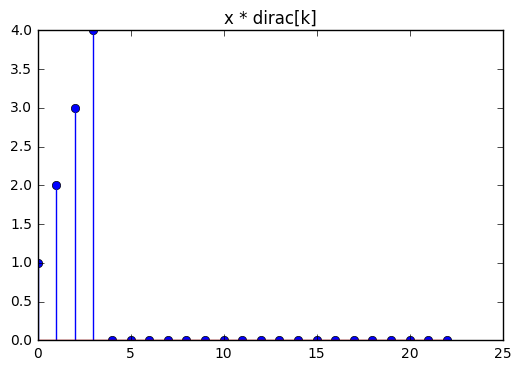

In [6]:
def dirac(n=0, N=20):
    if n > N-1:
        raise ValueError('n should be in 0 to N-1')
    s = np.zeros((N, ))
    s[n] = 1
    return s

x = [1,2,3,4]
dirac = dirac()

plt.figure()
#convolution of x and dirac
plt.stem(conv_fn(x,dirac))
plt.title('x * dirac[k]')

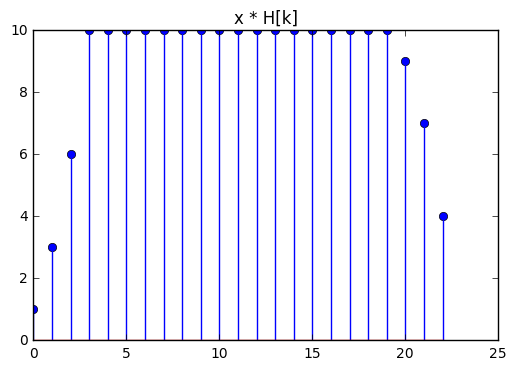

In [7]:
def step(n=0, N=20):
    if n > N-1:
        raise ValueError('n should be in 0 to N-1')
    s = np.zeros((N,))
    s[n:N] = 1
    return s

step = step()

plt.figure()
plt.stem(conv_fn(x,step))
plt.title('x * H[k]')

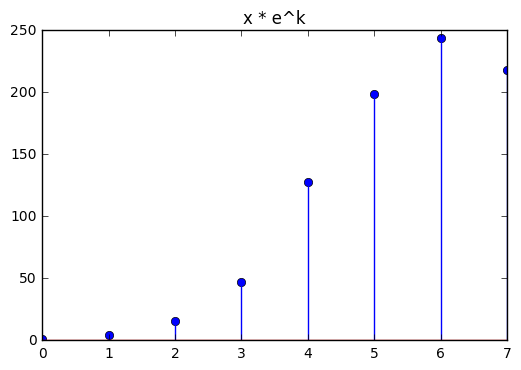

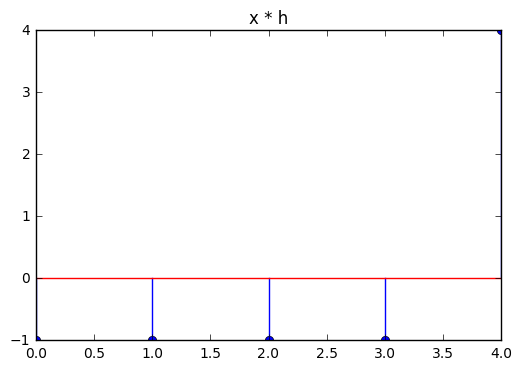

In [9]:
ek = np.zeros(5)
for i in range(5):
    ek[i] = np.exp([i])
    
plt.figure()
plt.stem(conv_fn(x,ek))
plt.title('x * e^k')
x = [1,2,3,4]
h = [-1,1]

plt.figure()
plt.stem(conv_fn(x,h))
plt.title('x * h')

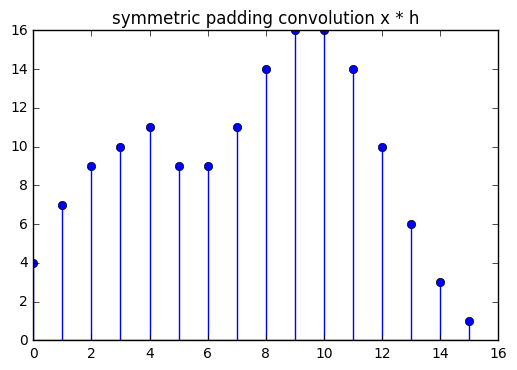

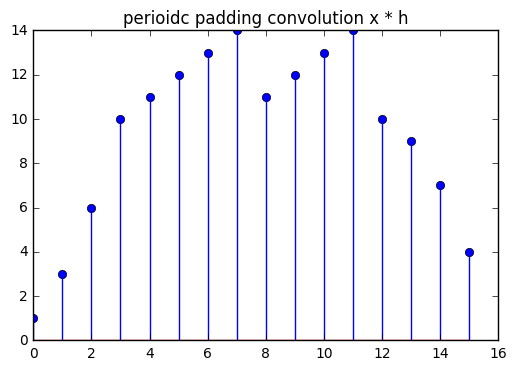

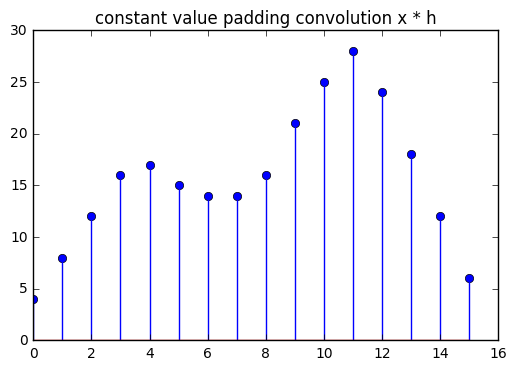

In [10]:
def step(n=0, N=20):
    if n > N-1:
        raise ValueError('n should be in 0 to N-1')
    s = np.zeros((N,))
    s[n:N] = 1
    return s

x = [1,2,3,4]
h_5 = step(0,5) #length of step is 5

#symmetry padding
x_syme = [4,3,2,1,1,2,3,4,4,3,2,1]

plt.figure()
plt.stem(conv_fn(x_syme,h_5))
plt.title('symmetric padding convolution x * h')

#periodic padding
x_pero = [1,2,3,4,1,2,3,4,1,2,3,4]

plt.figure()
plt.stem(conv_fn(x_pero,h_5))
plt.title('perioidc padding convolution x * h')

#constant value padding with value 4 and 6
x_const = [4,4,4,4,1,2,3,4,6,6,6,6]

plt.figure()
plt.stem(conv_fn(x_const,h_5))
plt.title('constant value padding convolution x * h')

## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


In [26]:
def conv_2d(image,kernal):
    im_i, im_j = image.shape #get dimensions of image and kernal
    k_m, k_n = kernal.shape
    
    #consider zero padiing image
    zero_pad = np.zeros((im_i+k_m-1, im_j+k_n-1))
    
    #put the image in the zero_pad matrix
    zero_pad[(k_m-1)/2 : (k_m-1)/2 + im_i, (k_n-1)/2 : (k_n-1)/2 + im_j ] = image
    
    out = np.zeros(image.shape)
    
    for row in range(im_i):
        for column in range(im_j):
            image_move = zero_pad[row:row+k_m, column:column+k_n]  
            out[row][column] = np.sum(np.multiply(kernal , image_move))
    
    return out
        

/home/muhammad-zain/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/muhammad-zain/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


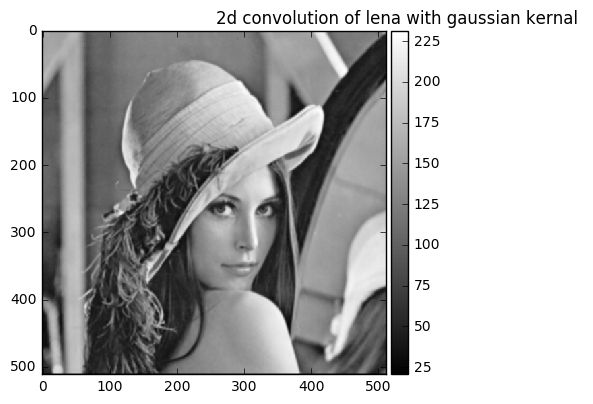

In [27]:
lena_im = io.imread("/home/muhammad-zain/Documents/Avinash/DSP-TP-1617/Lab3/images/lena-grey.bmp")

#gaussian kernal
gau_ker = 1./256 * np.matrix([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]])

lena_smooth = conv_2d(lena_im,gau_ker) #convolution function call

io.imshow(lena_smooth, cmap = plt.cm.gray)
plt.title('2d convolution of lena with gaussian kernal ')

/home/muhammad-zain/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


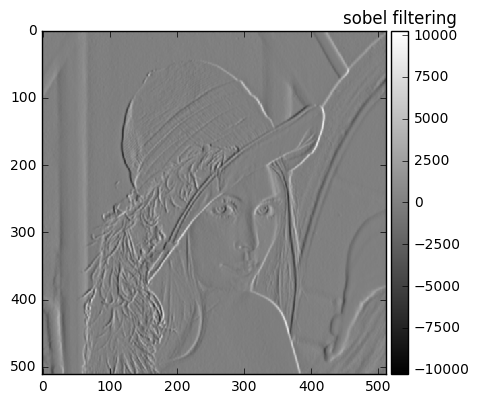

In [28]:
#sobel filter
sob_ker  = np.matrix([[1,2,0,-2,-1],[4,8,0,-8,-4],[6,12,0,-12,-6], [4,8,0,-8,-4], [1,2,0,-2,-1] ])

lena_sob = conv_2d(lena_im,sob_ker)

io.imshow(lena_sob, cmap = plt.cm.gray)
plt.title('sobel filtering')

## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

/home/muhammad-zain/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


first 10 characters recognized as a : 
1, a is detected at pixel location (38, 150)
2, a is detected at pixel location (64, 144)
3, a is detected at pixel location (116, 175)
4, a is detected at pixel location (142, 96)
5, a is detected at pixel location (142, 169)
6, a is detected at pixel location (168, 130)
7, a is detected at pixel location (194, 23)
8, a is detected at pixel location (220, 138)
9, a is detected at pixel location (246, 103)
10, a is detected at pixel location (246, 160)


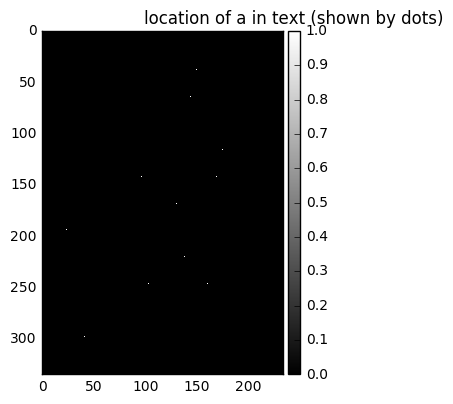

In [36]:


text_im = io.imread("/home/muhammad-zain/Documents/Avinash/DSP-TP-1617/Lab3/images/text.png")
text_im = color.rgb2gray(text_im)
text_im_thresh = filters.threshold_otsu(text_im)
text_im = (text_im < text_im_thresh).astype(int)

a_im = io.imread("/home/muhammad-zain/Documents/Avinash/DSP-TP-1617/Lab3/images/a.png")
a_im = color.rgb2gray(a_im)
a_im_thresh = filters.threshold_otsu(a_im)
a_im = (a_im < a_im_thresh).astype(int)

#cross corelation of images
cross_corr = correlate2d(text_im, a_im) 


cross_corr_max = np.max(cross_corr)

cross_corr_a = cross_corr > (0.85*cross_corr_max)

plt.figure()
io.imshow(cross_corr_a, cmap = plt.cm.gray) 
plt.title('location of a in text (shown by dots)')

total_a = 0
print('first 10 characters recognized as a : ')
for r in range(text_im.shape[0]):
    for c in range(text_im.shape[1]):
        if cross_corr_a[r][c] > 0:
            total_a += 1
            print('%d, a is detected at pixel location (%d, %d)'%(total_a,r,c))
    if total_a == 10:
        break
                